<a href="https://colab.research.google.com/github/ujeongmin/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%A0%95%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

test = pd.read_csv('/content/gdrive/MyDrive/ESAA/data/movies_test.csv')
train = pd.read_csv('/content/gdrive/MyDrive/ESAA/data/movies_train.csv')
submission = pd.read_csv('/content/gdrive/MyDrive/ESAA/data/submission.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [6]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [7]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


## 2) 데이터 요약


In [8]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


## 3) 데이터의 요약통계량 확인

In [11]:
pd.options.display.float_format = '{:.1f}'.format

In [12]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [13]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.0,107.0,243.0,243.0,243.0
mean,109.8,891669.5,0.9,159.3,3.5
std,124.0,1217341.5,1.2,163.0,2.1
min,40.0,34.0,0.0,0.0,0.0
25%,91.0,62502.0,0.0,18.0,2.0
50%,104.0,493120.0,0.0,105.0,3.0
75%,114.5,1080849.6,1.0,282.0,4.0
max,2015.0,6173099.5,6.0,776.0,16.0


## 4) 결측치 확인 및 데이터 전처리


In [14]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [15]:
test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [16]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [17]:
test[test['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5


In [18]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())
print(test[test['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0
0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [19]:
train['dir_prev_bfnum'].fillna(0, inplace=True)
test['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [20]:
train['release_time']=pd.to_datetime(train['release_time'])
test['release_time']=pd.to_datetime(test['release_time'])

In [24]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year']=train['release_time'].dt.year   #년도
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

test['release_year']=test['release_time'].dt.year   #년도
test['release_month']=test['release_time'].dt.month   #월
test['release_day']=test['release_time'].dt.day     #일
test['release_weekday']=test['release_time'].dt.weekday   #요일

## !! 그래프 그리기 !!



---



영화 제작 수가 가장 많은 배급사 5개 구해서 어느 장르를 많이 만들었는지(선호하는지) 그래프 그리고,  
각 배급사에서 어떤 장르가 가장 흥행했는지 평균 관객수를 구해서 별모양으로 표시

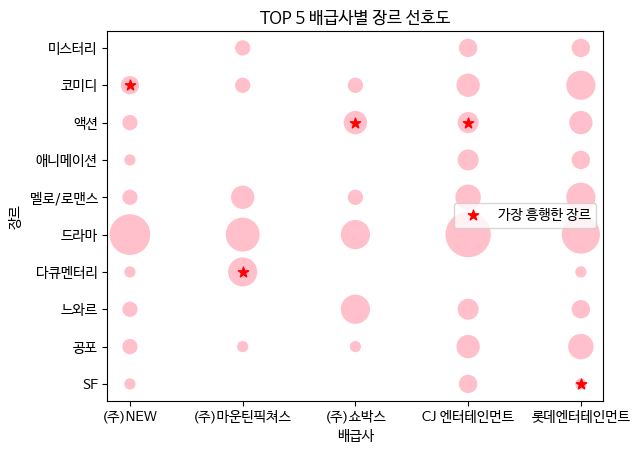

In [30]:
# 영화 제작 수가 가장 많은 배급사 TOP 5 구하기
top5_dist = train['distributor'].value_counts().nlargest(5).index.tolist()

# 각 배급사의 장르별 영화 제작 수를 genre_counts에 저장
genre_counts = train[train.distributor.isin(top5_dist)].groupby(['distributor', 'genre']).size().reset_index(name='count')

# 점의 크기는 영화 제작 수에 비례
plt.scatter(genre_counts['distributor'], genre_counts['genre'], color='pink', s=genre_counts['count'] * 50)
plt.title('TOP 5 배급사별 장르 선호도')
plt.xlabel('배급사')
plt.ylabel('장르')

top_genre = train[train.distributor.isin(top5_dist)].groupby(['distributor', 'genre']).box_off_num.mean().reset_index()
top_genre = top_genre.loc[top_genre.groupby('distributor')['box_off_num'].idxmax()]

plt.scatter(top_genre['distributor'], top_genre['genre'], color='red', s = 60, marker='*', label='가장 흥행한 장르')
plt.legend()

### 분석
> 배급사들은 드라마 장르 제작을 선호하지만 실제 관객들에게 선호되는 장르는 다르다는 것을 알 수 있다.



---



위에서 이어서 > 실제 관객들에게 선호되는 장르 알아보기

장르별로 영화 개봉수와 평균 관객수를 비교해서 인기 장르 알아냄

Text(0.5, 1.0, '장르별 영화 개봉 수(막대 그래프)와 평균 관객수(꺾은선 그래프)')

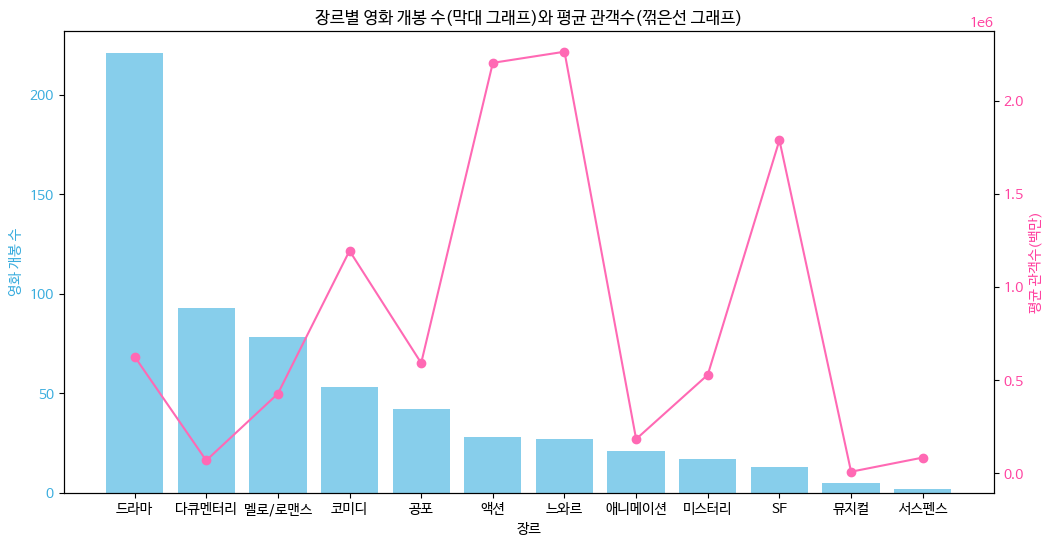

In [47]:
# 장르별 영화 개봉 수 계산
genre_counts = train['genre'].value_counts()

# 장르별 평균 관객수 계산
avg_boxoff = train.groupby('genre')['box_off_num'].mean()
avg_boxoff = avg_boxoff[genre_counts.index]

# 그래프 그리기
plt.figure(figsize=(12, 6))

# 개봉 개수 막대 그래프 (왼쪽 y축)
plt.bar(genre_counts.index, genre_counts, color='skyblue')
plt.xlabel('장르')
plt.ylabel('영화 개봉 수', color='#3aadde')
plt.tick_params(axis='y', labelcolor='#3aadde')

# 꺾은선 그래프 (오른쪽 y축)
ax2 = plt.twinx()
ax2.plot(avg_boxoff.index, avg_boxoff, marker='o', color='hotpink', linestyle='-')
ax2.set_ylabel('평균 관객수(백만)', color='#ff42a0')
ax2.tick_params(axis='y', labelcolor='#ff42a0')

plt.title('장르별 영화 개봉 수(막대 그래프)와 평균 관객수(꺾은선 그래프)')

### 분석
> 가장 많이 개봉한 장르는 드라마, 다큐멘터리, 멜로/로맨스  
> 느와르, 액션, SF, 코미디 장르는 다른 장르들과 비교했을 때 상대적으로 영화 개봉 수에 비해 평균 관객 수가 매우 높아 관객들에게 더 큰 관심과 인기를 누리고 있는 장르라는 것을 알 수 있다.  



---



위에서 이어서 > 왜 느와르, 액션, SF, 코미디 장르가 인기가 많은지 장르별 평균 스탭수 살펴봄

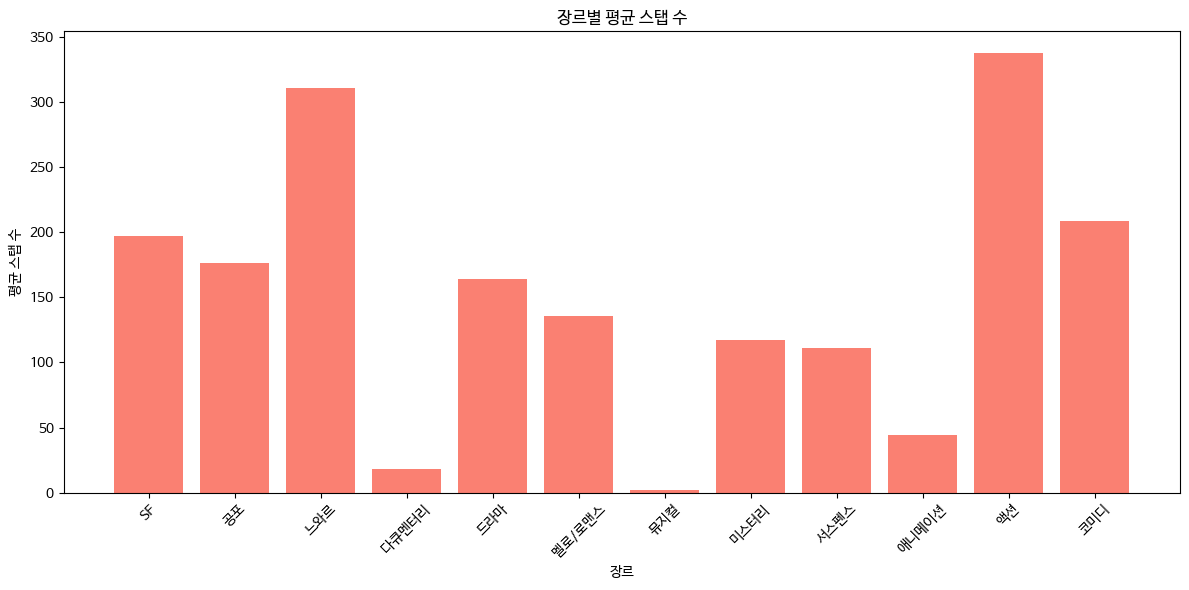

In [46]:
genre_avg_staff = train.groupby('genre')['num_staff'].mean()

# 그래프 그리기
plt.figure(figsize=(12, 6))

plt.bar(genre_avg_staff.index, genre_avg_staff.values, color='salmon')

plt.title('장르별 평균 스탭 수')
plt.xlabel('장르')
plt.ylabel('평균 스탭 수')
plt.xticks(rotation=45)  # X축 레이블 45도 회전

plt.tight_layout()
plt.show()

### 분석  
> 느와르, 액션, SF, 코미디 장르가 관객들에게 인기가 많았는데, 평균 스탭 수도 가장 많음  
> 제작 과정에 많은 스태프와 예산이 투입되면 특수효과 등 영화의 퀄리티가 높을 것이고, 그만큼 시각적인 즐거움을 많이 주기 때문에 관객들에게 사랑받는 장르라고 해석할 수 있다.



---



['느와르', '액션', 'SF', '코미디', '드라마']


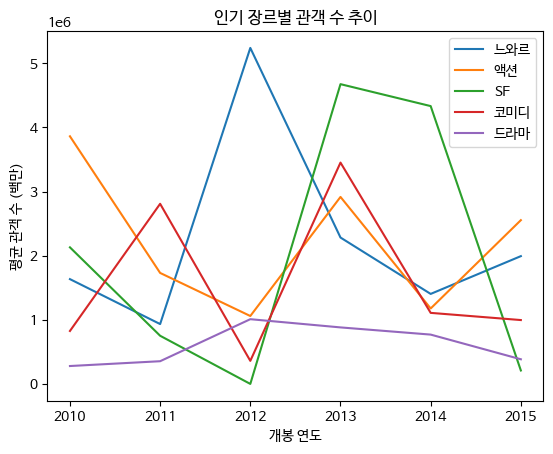

In [38]:
# 평균 관객 수가 가장 많은 인기 장르 5개 구하기
top5_genre = train.groupby('genre').box_off_num.mean()          # 평균 관객 수 구하기
top5_genre = top5_genre.nlargest(5).index.tolist()              # 상위 5개 장르만 리스트 형태로 저장
print(top5_genre)

# 인기 장르 TOP 5는 느와르, 액션, SF, 코미디, 드라마

# 인기 장르 TOP 5의 월별 평균 관객 수 구하기
top5_avg = train[train.genre.isin(top5_genre)].groupby(['genre','release_year']).box_off_num.mean().reset_index()
top5_avg = pd.DataFrame(top5_avg)

for genre in top5_genre:
  genre_data = top5_avg[top5_avg['genre'] == genre]
  plt.plot(genre_data['release_year'], genre_data['box_off_num'], label=genre)


plt.xlabel('개봉 연도')
plt.ylabel('평균 관객 수 (백만)')
plt.title('인기 장르별 관객 수 추이')
plt.legend()

### 분석  
> 연도별로 어떤 영화가 가장 히트 쳤는지 확인할 수 있음

* 모든 장르로 그려보기, 연도 별 사건과 연관이 있나?



---

